In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron Implementation

In [35]:
class Perceptron:

  def __init__(self, learning_rate=0.01, epochs=50):
    self.lr = learning_rate
    self.epochs = epochs
    self.weights = None

  def activation_fn(self, x):
    # Modified to handle array input for element-wise comparison
    return np.where(x >= 0, 1, 0)

  def fit(self, X, y):

    n_samples, n_features = X.shape
    X = np.c_[X,np.ones(n_samples)]
    self.weights = np.zeros(n_features+1)

    for epoch in range(self.epochs):
      for i in range(n_samples):
        z = np.dot(X[i], self.weights)

        y_hat = self.activation_fn(z)
        error = y[i] - y_hat

        self.weights += self.lr * error * X[i]
  def predict(self, X):
      X = np.c_[X,np.ones(len(X))]
      z_new = np.dot(X, self.weights)
      return self.activation_fn(z_new)

# Create Dataset

In [36]:
weather_data = pd.DataFrame({
    'Temperature': [30,32,26,28,25,33,27,31,24],
    'Humidity' : [40,35,60,70,80,30,65,45,85],
    "Rain" : [0,0,1,1,0,0,0,0,1]
})

X= weather_data[["Temperature", "Humidity"]].values
y= weather_data[["Rain"]].values


# Train Model

In [37]:
model = Perceptron(learning_rate=0.01, epochs=100)
model.fit(X,y)

# Predictions

In [38]:
predictions = model.predict(X)
print(predictions)
print("Actual", y)

[0 0 0 0 0 0 0 0 1]
Actual [[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


# Visualization

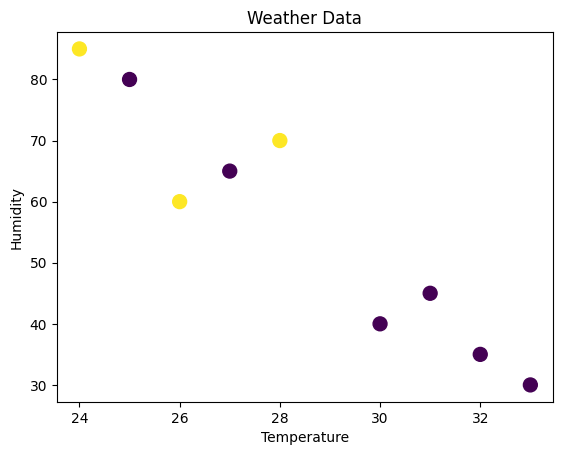

In [39]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Weather Data")
plt.show()

# Test New Weather

In [40]:
new = np.array([[35,50]])
print("New prediction", model.predict(new))

New prediction [0]
